In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', color_codes = True)

In [37]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis = 1)

In [39]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [40]:
ageMean = np.mean(df.Age)
df.Age.fillna(value=ageMean, inplace = True)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [42]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
print("Q = ", sum(df.Embarked == 'Q'))
print("S = ", sum(df.Embarked == 'S'))
print("C = ", sum(df.Embarked == 'C'))

Q =  77
S =  644
C =  168


In [44]:
df.Embarked.fillna(value='S', inplace = True)

In [45]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,7.2500,NaN,S
1,1,1,female,38.000000,1,0,71.2833,C85,C
2,1,3,female,26.000000,0,0,7.9250,NaN,S
3,1,1,female,35.000000,1,0,53.1000,C123,S
4,0,3,male,35.000000,0,0,8.0500,NaN,S
5,0,3,male,29.699118,0,0,8.4583,NaN,Q
6,0,1,male,54.000000,0,0,51.8625,E46,S
7,0,3,male,2.000000,3,1,21.0750,NaN,S
8,1,3,female,27.000000,0,2,11.1333,NaN,S
9,1,2,female,14.000000,1,0,30.0708,NaN,C


In [46]:
#Just for checking
import string
ls = df.Cabin.unique()
st = []
for j in ls:
    st.append(str(j)[0])
st = set(st)
st

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'}

In [47]:
df.Cabin.fillna(value='Z', inplace = True)

In [48]:
a = []
for i in df.Cabin:
    a.append(str(i)[0])
df.Cabin = a

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Z,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,Z,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,Z,S


In [50]:
from sklearn.preprocessing import LabelEncoder
cabinEncoder = LabelEncoder()

In [51]:
df.Cabin = cabinEncoder.fit_transform(df.Cabin)

In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,8,S
1,1,1,female,38.0,1,0,71.2833,2,C
2,1,3,female,26.0,0,0,7.9250,8,S
3,1,1,female,35.0,1,0,53.1000,2,S
4,0,3,male,35.0,0,0,8.0500,8,S


Label Encoding

In [53]:
sexEncoder = LabelEncoder()
df.Sex = sexEncoder.fit_transform(df.Sex)

In [54]:
embarkedEncoder = LabelEncoder()
df.Embarked = embarkedEncoder.fit_transform(df.Embarked)

In [55]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,8,2
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,8,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,8,2
5,0,3,1,29.699118,0,0,8.4583,8,1
6,0,1,1,54.000000,0,0,51.8625,4,2
7,0,3,1,2.000000,3,1,21.0750,8,2
8,1,3,0,27.000000,0,2,11.1333,8,2
9,1,2,0,14.000000,1,0,30.0708,8,0


SCALER

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [57]:
mmScale = MinMaxScaler()
df.Age = mmScale.fit_transform(df['Age'].reshape(-1,1))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [58]:
sScale = StandardScaler()
df.Fare = sScale.fit_transform(df.Fare.reshape(-1,1))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [59]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,0.271174,1,0,-0.502445,8,2
1,1,1,0,0.472229,1,0,0.786845,2,0
2,1,3,0,0.321438,0,0,-0.488854,8,2
3,1,1,0,0.434531,1,0,0.420730,2,2
4,0,3,1,0.434531,0,0,-0.486337,8,2
5,0,3,1,0.367921,0,0,-0.478116,8,1
6,0,1,1,0.673285,0,0,0.395814,4,2
7,0,3,1,0.019854,3,1,-0.224083,8,2
8,1,3,0,0.334004,0,2,-0.424256,8,2
9,1,2,0,0.170646,1,0,-0.042956,8,0


In [62]:
#data
# X = df.drop(['Survived'], axis=1)
X = df.drop(['Survived',	'Pclass',	'Sex',	'SibSp',	'Parch',	'Cabin','Embarked'], axis = 1).values
Y = df.Survived

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state = 297)

In [64]:
from sklearn.svm import SVC

In [65]:
clf_svc = SVC(kernel = 'linear')
clf_svc.fit(X_train, Y_train)
clf_svc.score(X_test, Y_test)

0.659217877094972

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, Y_train)
clf_dt.score(X_test, Y_test)

0.7541899441340782

In [ ]:
df.

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

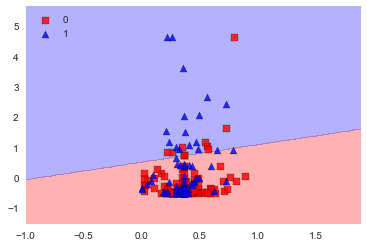

In [68]:
from mlxtend.plotting import plot_decision_regions
# Plot Decision Region using mlxtend's awesome plotting function
plot_decision_regions(X=X_test, 
                      y=Y_test.values,
                      clf=clf_svc, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X_test.columns[0], size=14)
plt.ylabel(X_test.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)